## **Genralized Code**

In [208]:
#libraries
import numpy as np
import matplotlib.pyplot as plt

# Defining Variables
n=7
var=1
forcemean=0
stiffnessmean=1
r=5
#computing stiffness Values
k = np.zeros((n,1))
for x in range(n):
  k[x][0] = (1 / (np.sqrt(2 * np.pi) * var)) * np.exp(-(np.square(x - stiffnessmean)) / (2 * np.square(var)))


#computing Force Values
F = np.zeros((n,1))
for x in range(n):
  F[x][0]=(1/((np.sqrt(2*np.pi))*var))*np.exp(-(np.square(x-forcemean))/(2*np.square(var)))

#Stiffness matrix
StiffMat=np.zeros((n,n))
StiffMat_inv=np.zeros((n,n))
StiffMat[0][0]=1/k[0][0]

# Filling StiffMat
for i in range(n):
    for j in range(i,n):
        if i==j:
            StiffMat[i][j]=StiffMat[i-1][j-1]+1/k[i][0]
        else:
            StiffMat[i][j]=StiffMat[i][j-1]

for j in range(n):
    for i in range(j,n):
      if i!=j:
        StiffMat[i][j]=StiffMat[i-1][j]

## **Computing Displacement from Force Vector and Stiffness Matrix**

In [209]:

#Calculating Displacement Vector
Disp = np.zeros((n,1))
ForceT=np.matrix.transpose(F)
StiffMat_inv=np.linalg.inv(StiffMat)
Disp=np.dot(StiffMat_inv,F)


### **PCA** **APPROACH**


In [210]:
#Finding Mean Displacement
sum=0
for i in range(n):
  sum=sum+Disp[i][0]

u2 = np.zeros((n,1))
u3 = np.zeros((r,1))
for i in range(0,n):
  u2[i][0]=sum/n
for i in range(r):
  u3[i][0]=sum/n
u=sum/n
Dispnew = np.zeros((n,1))
#subtracting the mean from the Displacment Values
Dispnew=Disp-u2

#Transpose of Dispnew for Covariance Matrix
DispnewT = np.transpose(Dispnew)
# Calculate Covariance matrix
result = np.dot(Dispnew,DispnewT)


#Finding Eigen Vectors and Eigen Values
EigenVector=np.zeros((n,n))
EigenValues=np.zeros((n,1))
EigenValues,EigenVectors = np.linalg.eig(result)

#ordering the Eigen Values and the Eigwn Vectors
sorted_EigenVectors=np.zeros((n,n))
sorted_EigenValues=np.zeros((n,1))

sorted_indices = np.argsort(EigenValues)[::-1]
sorted_EigenValues = EigenValues[sorted_indices]
sorted_EigenVectors = EigenVectors[:, sorted_indices]

#Selceting First R values
selected_eigenvectors=np.zeros((n,r))
selected_eigenvalues=np.zeros((n,1))

# Select top r eigenvectors
selected_eigenvectors = sorted_EigenVectors[:, :r]
selected_eigenvalues= sorted_EigenValues[:r]
selected_eigenvectorsT=np.transpose(selected_eigenvectors)

#Displacement Prediction
DispPred=np.zeros((1,r))
DispPred = np.dot(DispnewT, selected_eigenvectors)
DispPred2=np.zeros((r,1))
DispPred2=np.transpose(DispPred)+u3
sum2=0
for i in range(r):
  sum2=sum2+DispPred2[i][0]
u5=sum/r
#DispPred3=np.dot(selected_eigenvectors, np.dot(np.diag(selected_eigenvalues), selected_eigenvectors.T))
print("Prediction Value By PCA ",DispPred2)
print("Original Displacement Values",Dispnew)
print("Mean Displacement using PCA=",u5)
print("Mean Displacement Orginal=",u)


Prediction Value By PCA  [[0.17544584+0.00000000e+00j]
 [0.01379034-5.20417043e-18j]
 [0.01379034+5.20417043e-18j]
 [0.01379034+0.00000000e+00j]
 [0.01379034+0.00000000e+00j]]
Original Displacement Values [[ 0.14536461]
 [-0.03092733]
 [-0.05660019]
 [-0.01644703]
 [-0.01380937]
 [-0.01379035]
 [-0.01379034]]
Mean Displacement using PCA= 0.01930647052601078
Mean Displacement Orginal= 0.0137903360900077


### **MODE SHAPE APPROACH**

In [211]:
EigenVector2=np.zeros((n,n))
EigenValues2=np.zeros((n,1))

EigenValues2,EigenVectors2 = np.linalg.eig(StiffMat)

#ordering the Eigen Values and the Eigwn Vectors
sorted_indices2 = np.argsort(EigenValues2)[::-1]
sorted_EigenValues2= EigenValues2[sorted_indices]
sorted_EigenVectors2 = EigenVectors2[:, sorted_indices]

#Selceting First R values
# Select top r eigenvectors
selected_eigenvectors2 = sorted_EigenVectors2[:, :r]
selected_eigenvalues2= sorted_EigenValues2[:r]
selected_eigenvectorsT=np.transpose(selected_eigenvectors2)

#Displacement Prediction
DispPred3=np.zeros((1,r))
DispPred4=np.zeros((r,1))
#DispPred5=np.zeros(r)
#for i in range(r):
#DispPred5[i]=F[i][0]/selected_eigenvalues2[i]
DispPred3= np.dot(DispnewT, selected_eigenvectors2)
DispPred4=np.transpose(DispPred3)
sum3=0
for i in range(r):
  sum3=sum3+DispPred4[i][0]
u5=sum3/r
print("Prediction Value Using Mode Shape ",DispPred4.real)
print("Original Displacement",Dispnew)
print("Mean Displacement New=",u5)
print("Mean Displacement Orginal=",u)

Prediction Value Using Mode Shape  [[-0.01395409]
 [-0.02075581]
 [-0.10520995]
 [-0.11699731]
 [-0.01627   ]]
Original Displacement [[ 0.14536461]
 [-0.03092733]
 [-0.05660019]
 [-0.01644703]
 [-0.01380937]
 [-0.01379035]
 [-0.01379034]]
Mean Displacement New= -0.0546374325485956
Mean Displacement Orginal= 0.0137903360900077


## **Comparing the Principle Directions From Both The Approach**

In [212]:
print("Principle Direction for PCA=")
for i in range(n):
    for j in range(r):
        print(selected_eigenvectors[i][j].real, end=' ')
    print()
print()

print("Principle Direction for Mode Shape Approach")
for i in range(n):
    for j in range(r):
        print(selected_eigenvectors2[i][j].real, end=' ')
    print()

Principle Direction for PCA=
0.8992246271005957 -0.044504880059561006 -0.044504880059561006 -0.026238759195950246 -0.015784350794602702 
-0.19131627596535916 -0.044265887614449995 -0.044265887614449995 0.020791366750581946 0.0361114757759407 
-0.35012844925602093 -0.1669188677937118 -0.1669188677937118 -0.15650421935226683 -0.31785607149321893 
-0.10174124961609284 0.2828423982633019 0.2828423982633019 0.37220915646216995 0.9257540395042465 
-0.0854246624175188 -0.5456781491981946 -0.5456781491981946 -0.7798612073842511 -0.10357986939196667 
-0.0853070496909931 0.6973389643163331 0.6973389643163331 0.24936224553075922 -0.09000542884358728 
-0.08530694015461063 -0.17300294778284647 -0.17300294778284647 0.406793544044387 0.14684694473896814 

Principle Direction for Mode Shape Approach
6.145757549905105e-06 -0.3899379561330789 -0.6561155124590347 -0.6146016221378873 0.01953317555455396 
9.87332529088854e-06 -0.521629019902263 0.7207119141180945 -0.3393914408841139 0.031185393388300616 
1

### **PLOTTING MSE FOR PCA APPROACH**

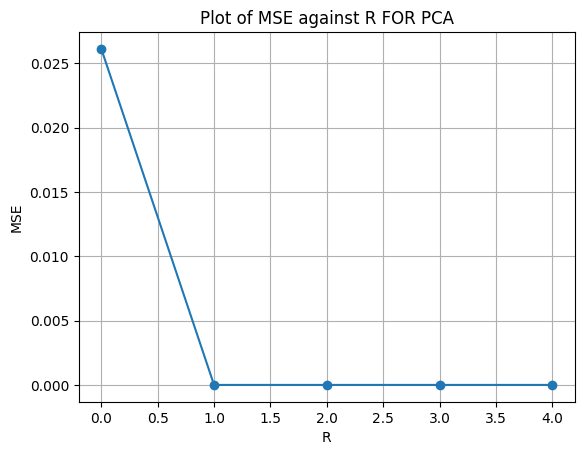

In [213]:
#MSE
mse=np.zeros(r)
for i in range(r):
  mse[i]=(u-DispPred2[i][0].real)*(u-DispPred2[i][0].real)

#Plotting MSE Vs R
plt.plot(mse, marker='o', linestyle='-')
plt.xlabel('R')
plt.ylabel('MSE')
plt.title('Plot of MSE against R FOR PCA')
plt.grid(True)
plt.show()


##**When The Displacement Data is Comming With Noise of +/-8%**

Prediction Value By PCA  [[0.17456809]
 [0.01440209]
 [0.01381678]
 [0.01380063]
 [0.01169862]]
Original Displacement Values [[ 0.14454136]
 [-0.03031338]
 [-0.05814877]
 [-0.01589988]
 [-0.01340506]
 [-0.01338714]
 [-0.01338713]]
Mean Displacement usin PCA= 0.01874197618206811
Mean Displacement Orginal= 0.0137903360900077


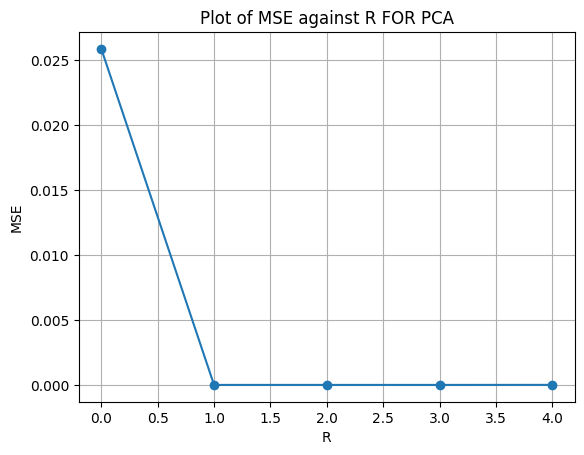

In [214]:
#Generating noise
Error_percentage=8
noise=np.random.uniform(-Error_percentage/100,Error_percentage/100,(n,1))

#Adding noise to the displacement vector
Disp_noise=Disp+Disp*noise

#Finding Mean Displacement
sum=0
for i in range(n):
  sum=sum+Disp_noise[i][0]

u2 = np.zeros((n,1))
u3 = np.zeros((r,1))
for i in range(0,n):
  u2[i][0]=sum/n
for i in range(r):
  u3[i][0]=sum/n

Dispnew_noise = np.zeros((n,1))
#subtracting the mean from the Displacment Values
Dispnew_noise=Disp_noise-u2

#Transpose of Dispnew for Covariance Matrix
DispnewT_noise = np.transpose(Dispnew_noise)
# Calculate Covariance matrix
result_noise = np.dot(Dispnew_noise,DispnewT_noise)


#Finding Eigen Vectors and Eigen Values
EigenVector_noise=np.zeros((n,n))
EigenValues_noise=np.zeros((n,1))
EigenValues_noise,EigenVectors_noise = np.linalg.eig(result_noise)

#ordering the Eigen Values and the Eigwn Vectors
sorted_EigenVectors_noise=np.zeros((n,n))
sorted_EigenValues_noise=np.zeros((n,1))

sorted_indices_noise=np.argsort(EigenValues_noise)[::-1]
sorted_EigenValues_noise=EigenValues[sorted_indices_noise]
sorted_EigenVectors_noise=EigenVectors[:, sorted_indices_noise]

#Selceting First R values
selected_eigenvectors_noise=np.zeros((n,r))
selected_eigenvalues_noise=np.zeros((n,1))

# Select top r eigenvectors
selected_eigenvectors_noise = sorted_EigenVectors_noise[:, :r]
selected_eigenvalues_noise= sorted_EigenValues_noise[:r]
selected_eigenvectorsT_noise=np.transpose(selected_eigenvectors_noise)

#Displacement Prediction
DispPred_noise=np.zeros((1,r))
DispPred_noise = np.dot(DispnewT_noise, selected_eigenvectors_noise)
DispPred2_noise=np.zeros((r,1))
DispPred2_noise=np.transpose(DispPred_noise)+u3
sum2=0
for i in range(r):
  sum2=sum2+DispPred2_noise[i][0]
u5=sum/r
#DispPred3=np.dot(selected_eigenvectors, np.dot(np.diag(selected_eigenvalues), selected_eigenvectors.T))
print("Prediction Value By PCA ",DispPred2_noise.real)
print("Original Displacement Values",Dispnew_noise)
print("Mean Displacement usin PCA=",u5)
print("Mean Displacement Orginal=",u)

#MSE
mse=np.zeros(r)
for i in range(r):
  mse[i]=(u-DispPred2_noise[i][0].real)*(u-DispPred2_noise[i][0].real)

#Plotting MSE Vs R

# Plotting the values against their indices
plt.plot(mse, marker='o', linestyle='-')
plt.xlabel('R')
plt.ylabel('MSE')
plt.title('Plot of MSE against R FOR PCA')
plt.grid(True)
plt.show()
